In [1]:
%matplotlib inline
import os
import numpy as np
import xarray as xr
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec



from scipy.interpolate import griddata

from matplotlib.patches import Rectangle

C:\Users\tamee\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\tamee\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import scipy.stats
from scipy import signal

In [3]:
import cartopy.crs as ccrs
from mpl_toolkits.basemap import Basemap

In [4]:
#shapefile= gpd.read_file('greatlakes_subbasins.shp')
#os.chdir("C:/Users/tamee/Downloads/Zg/MRI/zg/")

In [5]:
ds1 = xr.open_dataset('zg_Amon_MRI-ESM2-0_historical_r1i1p1f1_gn_200001-201412.nc')
hgt = ds1.zg.sel(lat=slice(-10,90), lon=slice(180.5, 360),plev=slice(6) ,time=slice('2010-01-01','2014-12-31'))
lat_zg = ds1.lat.sel(lat=slice(-10,90))
lon_zg = ds1.lon.sel(lon=slice(180.5, 360))

C:\Users\tamee\AppData\Roaming\Python\Python39\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [6]:
hgt2d = hgt.values
ntime,nlevel, nrow_zg, ncol_zg = hgt2d.shape
print(nrow_zg,ncol_zg)

89 159


In [7]:
#os.chdir("C:/Users/tamee/Downloads/Zg/MRI/zg/")
a= pd.read_csv("z_anom_mri.csv")
#os.chdir("C:/Users/tamee/Downloads/Zg/MRI/precip/")
b=pd.read_csv("precip_mri_anom.csv")
b

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190
0,X0.300715516449645,0.300716,-0.287502,-0.438640,-0.265509,-0.061407,-0.086223,0.735410,1.043580,1.271708,...,2.421299,1.849918,1.159447,0.333481,-0.124696,-0.370205,-0.624126,0.043209,-0.173548,-0.079326
1,X0.0325380734902951,0.032538,-0.041576,0.499507,1.354623,1.810418,2.024506,2.121102,0.930296,0.190740,...,-0.728305,-1.115955,-1.583295,-1.176352,-0.254835,-1.099981,-1.234832,-1.325841,-1.019355,-0.251892
2,X0.406554374619312,0.406554,-0.562628,-0.754794,-0.432437,-0.520660,-1.241882,-0.702215,-0.954491,-1.232735,...,0.381490,-0.031571,-0.595159,0.956009,0.482246,0.981746,0.123195,-0.537996,-0.386444,-0.126496
3,X1.83921039261064,1.839210,0.857261,-0.507554,-1.758444,-1.366193,-1.222224,-0.297609,-0.885730,-0.212545,...,-1.228514,-0.764957,-0.270993,0.297616,0.202470,-1.436383,-2.189176,-1.761598,-0.468185,-0.160034
4,X.1.67625057617327,-1.676251,-2.263293,-1.576234,-0.492506,0.119297,-0.142726,-0.359256,0.380971,1.167216,...,-0.260903,-0.496064,-0.212410,0.053127,-0.169674,0.124883,1.063750,1.539733,1.830799,2.173903
5,X0.396610504617922,0.396611,0.979600,0.723831,-0.340111,0.685639,1.194209,1.751425,1.745055,1.163698,...,1.508026,1.521178,1.527961,1.446172,2.397808,2.799615,1.096197,-0.531533,-1.223027,-1.389972
6,X.1.10795389369841,-1.107954,-0.399452,0.837057,-0.075245,-1.189837,-0.703310,-0.063909,-0.044537,0.219249,...,-1.618994,-1.520596,-0.786336,-0.249719,-0.706590,-0.606946,0.303429,0.353548,0.820417,2.052510
7,X0.0632541140877269,0.063254,-0.095154,0.329348,1.137893,0.145334,-0.637721,0.145557,-0.599446,-1.206812,...,-0.807640,-0.581582,-0.351906,-0.325300,-0.275517,-0.920160,-0.142151,1.049370,0.917015,0.646227
8,X0.258887211853367,0.258887,-0.049328,-0.339473,-0.180579,-0.202982,-0.269843,-0.817582,-0.519165,0.193239,...,0.128509,0.259410,-0.420852,-0.989548,-1.743183,-1.677947,-1.204419,0.557590,1.592547,1.624208
9,X.0.917987107386159,-0.917987,-0.950350,-1.203341,-0.291414,-0.903045,0.087214,1.768892,2.451754,1.849935,...,1.860845,2.110178,2.201172,1.844684,0.784339,0.327389,-0.001632,-0.862306,-1.417471,-1.706632


In [12]:
#a= a.drop(['Unnamed: 0'],axis=1)
b1= b.drop(['Unnamed: 0'],axis=1)
b1= b1.mean(axis=1)

a_t= a.T
b1

0     0.027008
1    -0.054603
2    -0.331563
3    -0.418498
4     0.372631
5     0.897919
6    -0.148965
7     0.251409
8    -0.569124
9     0.248164
10    0.773053
11    0.341336
12   -0.818023
13    0.636534
14   -0.081295
15   -0.351208
16   -0.473598
17   -0.232546
18   -0.410716
19   -0.217669
20    0.384049
21   -1.075168
22    0.145633
23   -0.693387
24    0.167047
25   -0.292859
26    0.362323
27   -0.595156
28   -0.047040
29    0.610807
30    0.741563
31   -0.281572
32    0.241211
33    0.255542
34    0.152241
35    0.484524
dtype: float64

In [13]:
a_zg = PCA(n_components=9)
a_zg.fit(a_t)
a_reduced= a_zg.transform(a_t)
a_reduced= signal.detrend(a_reduced, axis=0, type='linear')
zg_f=a_zg.inverse_transform(a_reduced)
print(a_zg.explained_variance_ratio_.sum()) 

0.9156553849934274


In [44]:
eofs = a_zg.components_
eofs_updated = signal.detrend(eofs, axis=0, type='linear')
year= np.arange(1, 37)   # [1 2 3 ... 36]

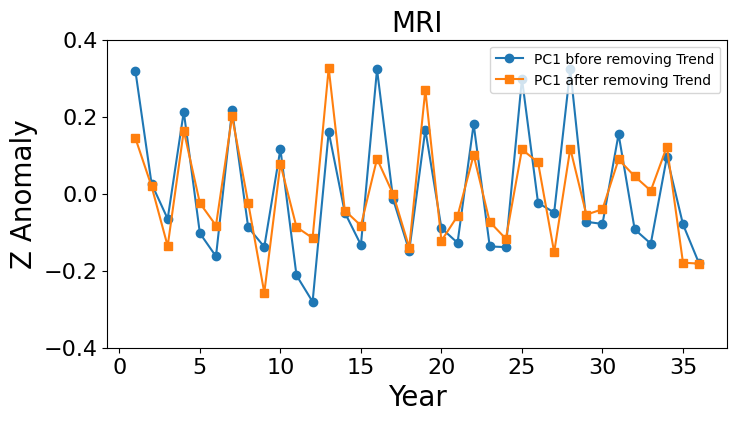

In [49]:
plt.figure(figsize=(8,4))
plt.plot(year, eofs[0], marker='o', label='PC1 bfore removing Trend')
plt.plot(year, eofs_updated[0], marker='s', label='PC1 after removing Trend')
plt.xlabel("Year",fontsize=20)
plt.ylim(-0.4,0.4)
plt.ylabel("Z Anomaly",fontsize=20)
plt.title("MRI",fontsize=20)
plt.legend()
plt.legend(loc="upper right")
plt.tick_params(axis='both', which='major', labelsize=16) 
os.chdir("C:/Users/tamee/Downloads/review figures/")
plt.savefig('ts_mri.png',dpi=300, bbox_inches="tight")

In [14]:
rp= np.reshape(zg_f,(nrow_zg,ncol_zg,36),order='F')
range(rp.shape[0])

range(0, 89)

In [15]:
cor_mri= np.empty((nrow_zg,ncol_zg),dtype=object)
cor_mri[:] = np.nan
cor_mri_p= np.empty((nrow_zg,ncol_zg),dtype=object)
cor_mri_p[:] = np.nan

In [16]:
for i in range((rp.shape[0])):
    for j in range((rp.shape[1])):
        cor_mri[i,j] = scipy.stats.spearmanr(rp[i,j,],b1)[0]
        
        
        

In [17]:
for i in range((rp.shape[0])):
    for j in range((rp.shape[1])):
        cor_mri_p[i,j] = scipy.stats.spearmanr(rp[i,j,],b1)[1]
        

In [18]:
mri_sign= np.zeros([89,159])

In [19]:
for i in range(mri_sign.shape[0]):
    for j in range(mri_sign.shape[1]):
        if cor_mri_p[i,j]<0.1:
            mri_sign[i,j]= mri_sign[i,j]+1
        else:
            mri_sign[i,j]= mri_sign[i,j]+0

In [20]:
y,x=np.where(mri_sign>0)


In [21]:
x_list1= x.tolist()
y_list1=y.tolist()
lat_np= lat_zg.to_numpy()
lat_ls= lat_np.tolist()
lon_np=lon_zg.to_numpy()
lon_ls= lon_np.tolist()

In [22]:
lat_list1= []
for values in list(range(len(y_list1))):
    lat_list1.append(lat_ls[y_list1[values]])
    

In [23]:
lon_list1= []
for values in list(range(len(x_list1))):
    lon_list1.append(lon_ls[x_list1[values]])

In [24]:
xmax,ymin,xmin,ymax= shapefile.total_bounds
d1=xmax-xmin
d2=ymax-ymin
rect =Rectangle((xmin, ymin), d1, d2, facecolor="none", ec='k', lw=2)

NameError: name 'shapefile' is not defined

In [25]:
cor_mri.max()

0.48211068211068214

In [26]:
pip install basemap-data-hires

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


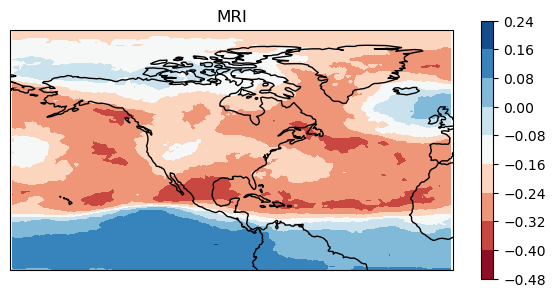

In [26]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.1, hspace=0.15)

ax2 = fig.add_subplot(gs[0,1],  projection=ccrs.PlateCarree())
x1, y1 = np.meshgrid(lon_zg, lat_zg)
level= np.arange(-0.4,0.45,0.05)
cs = ax2.contourf(x1, y1, cor_mri,
                        
                        transform=ccrs.PlateCarree(),
                        cmap='RdBu')
    
cb=fig.colorbar(cs, ax=ax2, shrink=0.8, aspect=20)  
#ax2.scatter(lon_list1,lat_list1,marker='o', color='tab:red')
ax2.coastlines()
ax2.set_global()
ax2.set_extent([-180,0,-7.5,90],crs=ccrs.PlateCarree())
ax2.set_title('MRI')
#ax2.add_patch(rect)


In [27]:
def to_float(arr):
    # fast path if already numeric
    if isinstance(arr, np.ndarray) and np.issubdtype(arr.dtype, np.number):
        return arr.astype(np.float64, copy=False)
    # attempt robust conversion (handles lists / mixed types)
    return np.array(arr, dtype=np.float64)

In [28]:
cor_mri= to_float(cor_mri)

C:\Users\tamee\AppData\Local\Temp\ipykernel_6312\67466136.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  m.plot(lon_list1,lat_list1,'bo',markersize=0.2,color='k')


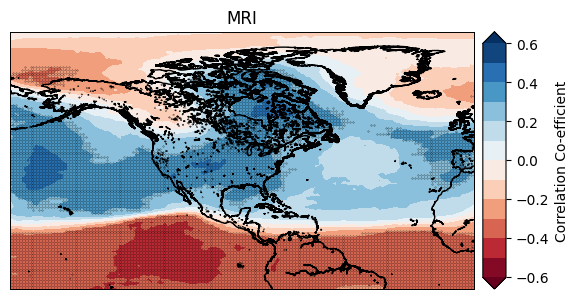

In [34]:
m = Basemap(projection='cyl', llcrnrlon=min(lon_zg), llcrnrlat=min(lat_zg),
        urcrnrlon=max(lon_zg), urcrnrlat=max(lat_zg),resolution='h')

x, y = m(*np.meshgrid(lon_zg,lat_zg))

cs = m.contourf(x,y,cor_mri,np.arange(-0.6,0.7,0.1), cmap='RdBu',extend='both')
m.plot(lon_list1,lat_list1,'bo',markersize=0.2,color='k')
m.drawcoastlines()
#m.drawcountries()
cb = m.colorbar(cs)
circle = m.drawmapboundary(fill_color='k',color='k',linewidth=0.7)
circle.set_clip_on(False)
cb.set_label('Correlation Co-efficient')
plt.title('MRI')
plt.savefig('PCA_MRI.png')
os.chdir("C:/Users/tamee/Downloads/review figures/")
plt.savefig('PCA_MRI_trend_removed.png')

In [ ]:
os.chdir("C:/Users/tamee/Downloads/review figures/")
np.savetxt("cor_mri.txt", cor_mri, fmt="%.2f", delimiter="\t")

In [30]:
os.chdir('C:/Users/tamee/Downloads/new_runs/MRI/historical')

In [31]:
mri= pd.read_csv('TP_s6_8.csv')

In [39]:
b1=(mri - mri.mean())/mri.std()
b1= np.mean(b1,axis=1)
b1

0    -0.321289
1     1.035028
2    -1.022313
3    -0.090451
4     0.070928
5    -0.085346
6     0.189759
7     0.354020
8    -0.143211
9     1.078186
10    0.792569
11   -0.749388
12    0.922967
13   -0.155719
14   -0.484719
15    0.057691
16   -0.581224
17   -0.102800
18   -1.809722
19   -0.101715
20   -0.542404
21    0.847958
22    1.146874
23   -0.465151
24    0.081963
25   -0.983690
26   -0.579589
27    0.340999
28    0.769436
29    0.617019
30    0.031289
31   -1.114625
32   -0.219928
33    1.048396
34   -0.889086
35    1.057290
dtype: float64

In [37]:
from scipy.interpolate import RegularGridInterpolator


In [35]:
os.chdir("C:/Users/tamee/Downloads/")
ds1 = xr.open_dataset('hgt.mon.mean.nc')
hgt = ds1.hgt.sel(lat=slice(90,-7.5), lon=slice(182.5, 360),level=slice(6) ,time=slice('1979-01-01','2014-12-31'))
lat_cpc = ds1.lat.sel(lat=slice(90, -7.5))
lon_cpc = ds1.lon.sel(lon=slice(182.5, 360))

In [40]:
os.chdir("C:/Users/tamee/Downloads/review figures/")


cpc = np.loadtxt("cor_cpc.txt")  


In [41]:
fA = RegularGridInterpolator((lat_zg, lon_zg), cor_mri, bounds_error=False, fill_value=np.nan)
LATB, LONB = np.meshgrid(lat_cpc, lon_cpc, indexing='ij')  # (nlatB, nlonB)
pts = np.column_stack((LATB.ravel(), LONB.ravel()))
A_on_B = fA(pts).reshape(LATB.shape)

In [42]:
mask = np.isfinite(A_on_B) & np.isfinite(cpc)
r = np.corrcoef(A_on_B[mask].ravel(), cpc[mask].ravel())[0, 1]

In [43]:
r

0.22808750116968968